In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
n_pts = 10
random_x1_values = np.random.normal(10, 2, n_pts)
random_x2_values = np.random.normal(12, 2, n_pts)
random_x1_values.mean(), random_x2_values.mean()

(10.452096051533172, 12.10226101772792)

In [3]:
top_region = np.array([random_x1_values,random_x2_values])
top_region

array([[12.62757254, 11.75104365,  9.33367747,  6.19121787, 12.33342323,
         9.85725466, 10.74152138, 13.12224405,  5.78034909, 12.78265657],
       [12.41075534,  9.92036599,  9.83861764, 10.92866427, 11.92150822,
        13.54807657, 14.95464139, 13.20507198, 11.93621402, 12.35869476]])

In [4]:
top_region = top_region.T
top_region

array([[12.62757254, 12.41075534],
       [11.75104365,  9.92036599],
       [ 9.33367747,  9.83861764],
       [ 6.19121787, 10.92866427],
       [12.33342323, 11.92150822],
       [ 9.85725466, 13.54807657],
       [10.74152138, 14.95464139],
       [13.12224405, 13.20507198],
       [ 5.78034909, 11.93621402],
       [12.78265657, 12.35869476]])

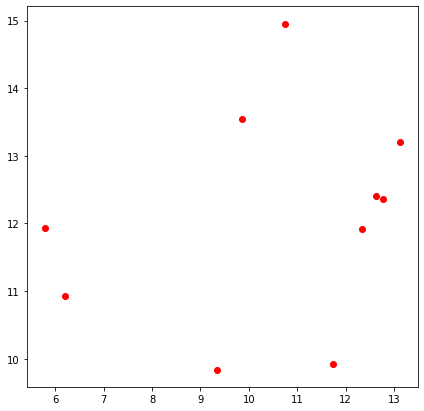

In [6]:
_, ax = plt.subplots(figsize = (7,7))
ax.scatter(top_region[:,0], top_region[:,1], color = "r")
plt.show()

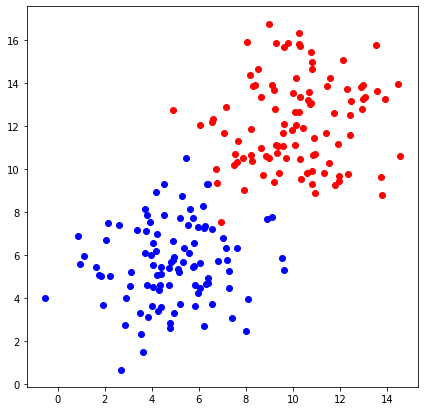

In [7]:
n_pts = 100
np.random.seed(0)

top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts)]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts)]).T

_, ax = plt.subplots(figsize = (7,7))
ax.scatter(top_region[:,0], top_region[:,1], color = "r")
ax.scatter(bottom_region[:,0], bottom_region[:,1], color = "b")
plt.show()

---

In [72]:
def draw(x1,x2):

    ln = plt.plot(x1,x2,"-")

def sigmoid(score):
    return 1 / (1+np.exp(-score))

def calculate_error(line_parameters, points, y):

    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):

    m = points.shape[0]
    for i in range(500):

        p = sigmoid(points * line_parameters)
        gradient = (points.T * (p-y))*(alpha / m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)

        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = -b / w2 + x1*(-w1/w2)
        
        #print(calculate_error(line_parameters,points,y))
    print(calculate_error(line_parameters, points,y))
    draw(x1,x2)

In [69]:
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)

top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts), bias]).T

all_points = np.vstack((top_region, bottom_region)) # (n_pts, 3)
#print(all_points.shape)

#w1 = -0.2
#w2 = -0.35
#b = 3.5

#line_parameters = np.matrix([w1,w2,b]).T # (3,1)
line_parameters = np.matrix([np.zeros(3)]).T
#print(line_parameters.shape)

#x1 = np.array([bottom_region[:,0].min(), top_region[:,0].max()])
#x2 = -b / w2 + x1*(-w1/w2)

#print(x1,x2)

linear_combination = all_points * line_parameters

#print(all_points.shape) # (n_pts, 3)
#print(line_parameters.shape) # (3, 1)
#print(linear_combination.shape) # (n_pts, 1)

prob = sigmoid(linear_combination)

#print(prob.shape) # (n_pts, 1)

y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1) # (n_pts, 1)

#print(y.shape) # (n_pts, 1)


In [70]:
calculate_error(line_parameters, all_points, y)

matrix([[0.69314718]])

[[0.29502231]]


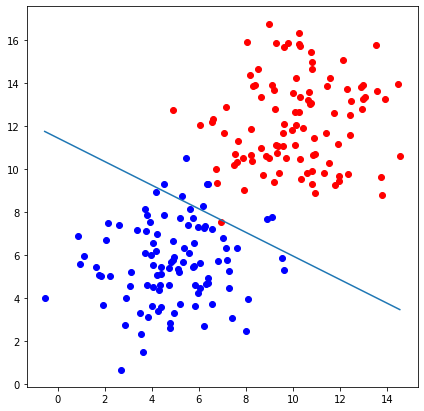

In [71]:
_,ax = plt.subplots(figsize = (7,7))
ax.scatter(top_region[:, 0], top_region[:, 1] ,color = "r")
ax.scatter(bottom_region[:, 0], bottom_region[:, 1] ,color = "b")
gradient_descent(line_parameters, all_points, y, 0.06)
#draw(x1,x2)
plt.show()